# 0 Utils

In [1]:
import os
import numpy as np
import seaborn as sb
%matplotlib inline
sb.set()
import matplotlib.pyplot as plt
import pandas as pd

N_JOBS = 6

# 1 Load Dataset

In [36]:
personas = pd.read_csv('..\\..\\Datos\\working\\personas_cotizacion2.csv',encoding = "ISO-8859-1")
print(personas.shape)
personas.head(2)


(6184, 33)


,Unnamed: 0,is_apellido1,is_appelido2,is_celular,is_direccion,is_fnac,is_nombre,is_nombrecompleto,is_nrofam,is_profesion,...,nro_cot_estu,nro_proyectos,rut,sexo,tipo_cliente,Altos del Valle,Edificio Urban 1470,San Andres Del Valle,Edificio Mil610,Edificio Junge
0,0,True,True,True,False,True,True,True,False,True,...,0.0,2.0,000.000.000-0,Femenino,Natural,0.0,1.0,1.0,0.0,0.0
1,1,True,True,True,False,False,True,True,False,False,...,0.0,1.0,1.462.558-5,Masculino,Natural,0.0,0.0,0.0,1.0,0.0


In [37]:
print(personas.shape)
print(personas.columns)

(6184, 33)
Index(['Unnamed: 0', 'is_apellido1', 'is_appelido2', 'is_celular',
       'is_direccion', 'is_fnac', 'is_nombre', 'is_nombrecompleto',
       'is_nrofam', 'is_profesion', 'is_telefono', 'loc_comuna',
       'loc_provincia', 'loc_region', 'max_rango_edad', 'mean_cot_bod',
       'mean_cot_depto', 'mean_cot_esta', 'mean_cot_estu', 'negocio',
       'nro_cot_bod', 'nro_cot_depto', 'nro_cot_esta', 'nro_cot_estu',
       'nro_proyectos', 'rut', 'sexo', 'tipo_cliente', 'Altos del Valle',
       'Edificio Urban 1470', 'San Andres Del Valle', 'Edificio Mil610',
       'Edificio Junge'],
      dtype='object')


In [4]:
# Ready Data Set

print(personas.shape)
# print(personas.columns)
drop_columns = [personas.columns[0], 'rut', 'negocio', 'max_rango_edad']

p_negocio = personas.negocio
personas = personas.drop(drop_columns, axis=1)

print(personas.shape)
print(p_negocio.shape)

personas = pd.get_dummies(personas)

print(personas.shape)
# personas.describe()

(6184, 33)
(6184, 29)
(6184,)
(6184, 44)


## Correlacion 

In [5]:
# from scipy.stats.stats import pearsonr, spearmanr, kendalltau
# corr_p = personas.corr(method='pearson')

# import seaborn as sns
# f = plt.figure(figsize=(40,20))
# g = sns.heatmap(corr_p, annot=True).get_figure()
# g.savefig('..\\img\\time_series_corr.png')

In [6]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold()
personas_vt = vt.fit_transform(personas)

In [7]:
print(personas_vt.shape)
print(vt.variances_)

(6184, 42)
[3.86592115e-03 3.46103495e-02 3.22369291e-03 1.68261708e-01
 1.21009373e-01 0.00000000e+00 0.00000000e+00 2.19102729e-01
 2.31505056e-01 1.04605279e-01 1.07119169e-01 6.64540086e-03
 1.82111084e-01 1.06965040e-03 1.23318594e+00 6.74268715e+00
 2.10241906e+00 1.00053721e-02 6.80100882e-02 2.24485339e-01
 1.38244627e+00 6.57895046e+00 1.03303582e+00 6.27199161e-01
 1.99600145e-02 2.12470336e-01 7.70171824e-03 2.47435428e-02
 1.55962096e-02 8.94302829e-02 8.65596063e-03 6.77494314e-02
 5.26767059e-02 9.50818914e-02 6.27450718e-02 3.76018361e-02
 6.66432089e-02 3.87925732e-02 3.03871235e-02 2.39752694e-01
 2.43566839e-01 2.05800681e-02 4.34704320e-03 4.34704320e-03]


# 3 Supervised Learning: Classification

## 3.1 Libraries

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler

## 3.2 Check the Dataset

In [9]:
print("Tamaño Total: ",personas.shape)
print("Personas que hicieron Negocio: ",p_negocio[p_negocio == True].shape)
print("Personas que no Hicieorn Negocio: ",p_negocio[p_negocio == False].shape)

Tamaño Total:  (6184, 44)
Personas que hicieron Negocio:  (1101,)
Personas que no Hicieorn Negocio:  (5083,)


In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# transformer = SelectKBest(score_func=chi2,k=10)
# Xt_chi2 = transformer.fit_transform(X,y)
# print(Xt_chi2.shape)
# print(transformer.scores_)

## 3.3 Train & Test

In [11]:
X = personas
y = p_negocio

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4328, 44) (1856, 44) (4328,) (1856,)


## 3.4 Help Functions

In [12]:
# Import necessary modules
def roc_curve_plot(model, X_test, y_test):
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = model.predict_proba(X_test)[:,1]

    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, treshold = roc_curve(y_test, y_pred_prob)

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

In [13]:
def plot_confusion_matrix(model,X,y,y_pred):
    print(confusion_matrix(y, y_pred))
    print(classification_report(y, y_pred))
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(5,5))
    sb.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Acc: {0}'.format(model.score(X, y))
    plt.title(all_sample_title, size = 10);
    plt.show()

In [14]:
def plot_importance_graph(model):
    features = personas.columns
    
    feature_importance = model.best_estimator_.feature_importances_ 
    fig = plt.figure(figsize=(20, 18))
    ax = fig.add_subplot(111)

    df_f = pd.DataFrame(feature_importance, columns=["importance"])
    df_f["labels"] = features
    df_f.sort_values("importance", inplace=True, ascending=False)
    display(df_f.head(5))

    index = np.arange(len(feature_importance[:20]))
    bar_width = 0.5
    rects = plt.barh(index[:20] , df_f["importance"][:20], bar_width, alpha=0.4, color='b', label='Main')
    plt.yticks(index, df_f["labels"])
    plt.show()

In [15]:
def grid_results(grid):
    

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    best_model = grid.best_estimator_
    best_model.fit(X_train,y_train)
#     mse = mean_squared_error(y_test, best_model.predict(X_test))
#     print( 'MSE: '+ str(mse))
#     print( 'RMSE: '+  str(np.sqrt(mse)))
    
    print("Best score is {}".format(grid.best_score_))
    
    y_pred = best_model.predict(X_test)
    # Confusion Matrix
    print()
    plot_confusion_matrix(best_model, X_test, y_test, y_pred)

    #ROC Curve
    roc_curve_plot(best_model, X_test, y_test)

    # Grid Scores
#     print(grid.grid_scores_)

## 3.5 Models

0.8453663793103449
[[1330  200]
 [  87  239]]
             precision    recall  f1-score   support

      False       0.94      0.87      0.90      1530
       True       0.54      0.73      0.62       326

avg / total       0.87      0.85      0.85      1856



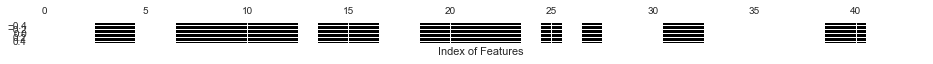

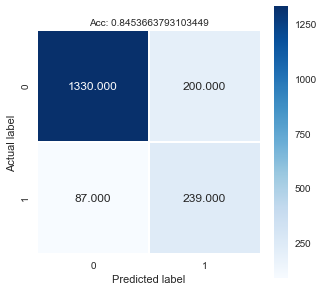

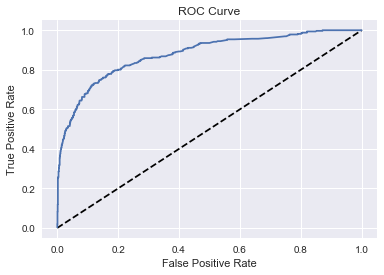

In [47]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=12, max_features=13,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

select = SelectFromModel(rf, threshold='median')

select.fit(X_train, y_train)
X_train_s = select.transform(X_train)

mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('Index of Features')

X_test_s = select.transform(X_test)

log = LogisticRegression(C=0.4393970560760795, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

log.fit(X_train_s, y_train)
score = log.score(X_test_s, y_test)
print(score)

plot_confusion_matrix(log, X_test_s, y_test, log.predict(X_test_s))
roc_curve_plot(log, X_test_s, y_test)

# KNeighbors

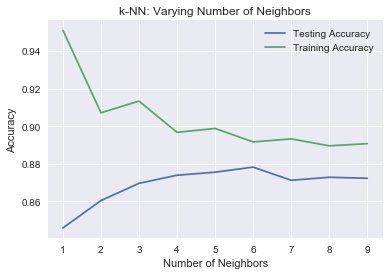

In [17]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=N_JOBS)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


# KNeighbors

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
           
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Best Params:  {'n_neighbors': 5}
Best Estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Best score is 0.880012936610608

[[1463   67]
 [ 158  168]]
             precision    recall  f1-score   support

      False       0.90      0.96      0.93      1530
       True       0.71      0.52      0.60       326

avg / total       0.87      0.88      0.87      1856



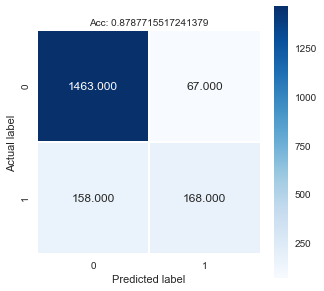

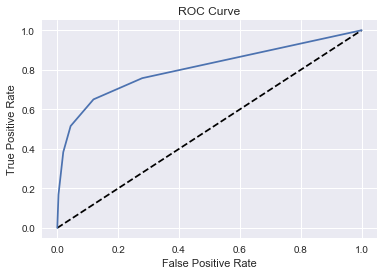

In [18]:
from sklearn.metrics import mean_squared_error
X = MinMaxScaler().fit_transform(X)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier()

# Param Grid
param_grid = {'n_neighbors': np.arange(1, 10)}

# Stratified
from sklearn.model_selection import GridSearchCV, StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearch
knn_cv = GridSearchCV(knn, param_grid, cv=kf, n_jobs=N_JOBS)
knn_cv.fit(X,y)

print("Best Params: ",knn_cv.best_params_)
print('Best Estimator: ', knn_cv.best_estimator_)

grid_results(knn_cv)

# PCA + KNN

TN -> 81:
[('pca', PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)),
('clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
metric_params=None, n_jobs=1, n_neighbors=5, p=2, weights='uniform'))]

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=6)]: Done  40 out of  40 | elapsed:    6.8s finished


Best parameters set:  {'memory': None, 'steps': [('pca', PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))], 'pca': PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), 'clf': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'), 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 9, 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca__whiten': False, 'clf__algorithm': 'auto', 'clf__leaf_size': 30, 'clf__metric': 'minkowski', 'clf__metric_params': None, 'clf__n_jobs': 1, 'clf__n_neighbors': 5, 'clf__p': 2, 'clf__weights': 'uniform'}


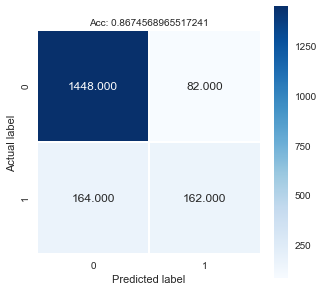

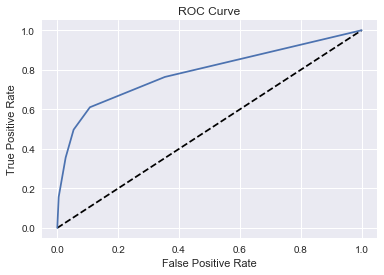

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import LinearSVC 

pipe = Pipeline([
    ('pca', PCA()),
    ('clf', KNeighborsClassifier()),
])

parameters = {
    'pca__n_components': [2, 3, 4, 5, 6, 7, 8, 9],
    #'clf__C': [1, 10, 100],
    }

from sklearn.model_selection import GridSearchCV, StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

gs = GridSearchCV(pipe, parameters, cv=kf, n_jobs=N_JOBS, verbose=1)
gs.fit(X, y)

best_parameters = gs.best_estimator_.get_params()
print("Best parameters set: ",best_parameters)
print('Best Estimator: ', gs.best_estimator_)
    
    
grid_results(gs)
# print("Best score: %0.3f" % gs.best_score_)


# y_pred = gs.predict(X_test) 
# # results(y_pred, y)

# plot_confusion_matrix(gs,X_test,y_test,y_pred)
# roc_curve_plot(gs, X_test, y_test)

# LogisticRegression

LogisticRegression(C=3.727593720314938, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
          
          
          
LogisticRegression(C=3.727593720314938, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
Best score is 0.8921410090556274

## Grid

Tuned Logistic Regression Parameters: {'C': 3.727593720314938, 'penalty': 'l1'}
Best Estimator:  LogisticRegression(C=3.727593720314938, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
Best score is 0.8923027166882277

[[1470   60]
 [ 141  185]]
             precision    recall  f1-score   support

      False       0.91      0.96      0.94      1530
       True       0.76      0.57      0.65       326

avg / total       0.88      0.89      0.89      1856



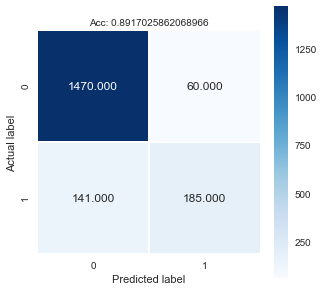

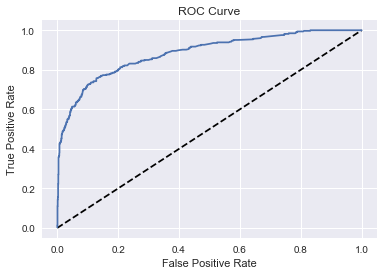

ROC AUC Score: 0.77579754089513


In [20]:
X = MinMaxScaler().fit_transform(X)


# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
C = np.logspace(0, 4, 10)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}


# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression(class_weight=None)
# logreg = LogisticRegression()

# Stratified
from sklearn.model_selection import GridSearchCV, StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=kf, n_jobs=N_JOBS)
logreg_cv.fit(X, y)

# # Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print('Best Estimator: ', logreg_cv.best_estimator_)
# print("Best score is {}".format(logreg_cv.best_score_))
# Fit it to the data
grid_results(logreg_cv)
# # 
y_pred_prob = logreg_cv.predict_proba(X_test)[:,1]

print("ROC AUC Score:" ,roc_auc_score(y_test,y_pred_prob))

## LR Unbalanced

(4328, 44) (1856, 44) (4328,) (1856,)
[[1470   60]
 [ 141  185]]
             precision    recall  f1-score   support

      False       0.91      0.96      0.94      1530
       True       0.76      0.57      0.65       326

avg / total       0.88      0.89      0.89      1856



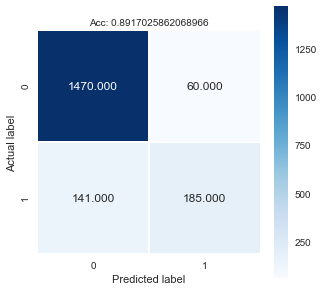

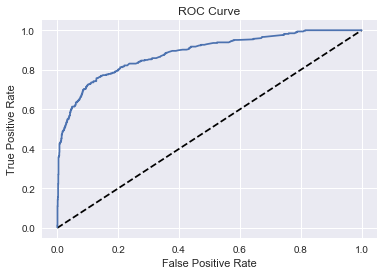

In [28]:
# Balanced Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape,X_test.shape,y_train.shape, y_test.shape)

model = LogisticRegression(C=3.727593720314938, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plot_confusion_matrix(model, X_test, y_test, y_pred)

#ROC Curve
roc_curve_plot(model, X_test, y_test)

## LR Balanced

(4328, 44) (1856, 44) (4328,) (1856,)
[[1316  214]
 [  79  247]]
             precision    recall  f1-score   support

      False       0.94      0.86      0.90      1530
       True       0.54      0.76      0.63       326

avg / total       0.87      0.84      0.85      1856



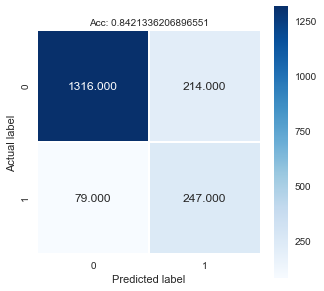

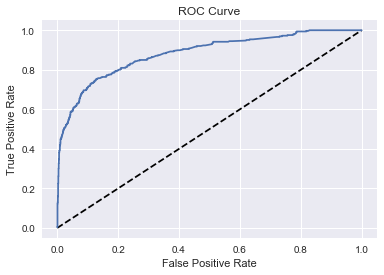

In [33]:
# Balanced Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape,X_test.shape,y_train.shape, y_test.shape)

model = LogisticRegression(C=3.727593720314938, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plot_confusion_matrix(model, X_test, y_test, y_pred)

#ROC Curve
roc_curve_plot(model, X_test, y_test)

# DecisionTree

Current Bests: 

Best score is 0.8927878395860285

[[1480   50]
 [ 159  167]]
             precision    recall  f1-score   support

      False       0.90      0.97      0.93      1530
       True       0.77      0.51      0.62       326

avg / total       0.88      0.89      0.88      1856



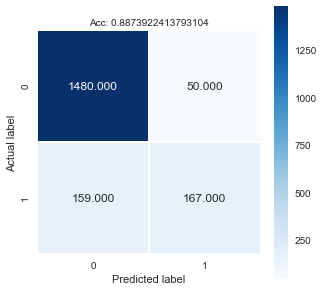

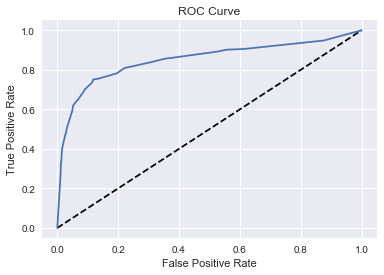

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 25, 'min_samples_leaf': 2}
Best score is 0.8927878395860285
Best estimator is DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=25, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [23]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3,5,10,15,20, None],
              "max_features": randint(1, 30),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

param_dist = {
    "max_depth": range(1,20),
    "max_features":range(1,30),
    "min_samples_leaf": range(1,10),
    "criterion": ["gini", "entropy"]
}

# Instantiate a Decision Tree classifier: tree
# tree = DecisionTreeClassifier(class_weight='balanced')
tree = DecisionTreeClassifier()

# Stratified
from sklearn.model_selection import GridSearchCV, StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate the RandomizedSearchCV object: tree_cv
# tree_cv = RandomizedSearchCV(tree, param_dist, cv=kf)
tree_cv = GridSearchCV(tree, param_dist, cv=kf, n_jobs=N_JOBS)


# Fit it to the data
tree_cv.fit(X,y)
grid_results(tree_cv)

# # Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))
print("Best estimator is {}".format(tree_cv.best_estimator_))

,importance,labels
3,0.502916,is_direccion
21,0.139887,San Andres Del Valle
15,0.119269,nro_cot_depto
7,0.055960,is_nrofam
4,0.020482,is_fnac


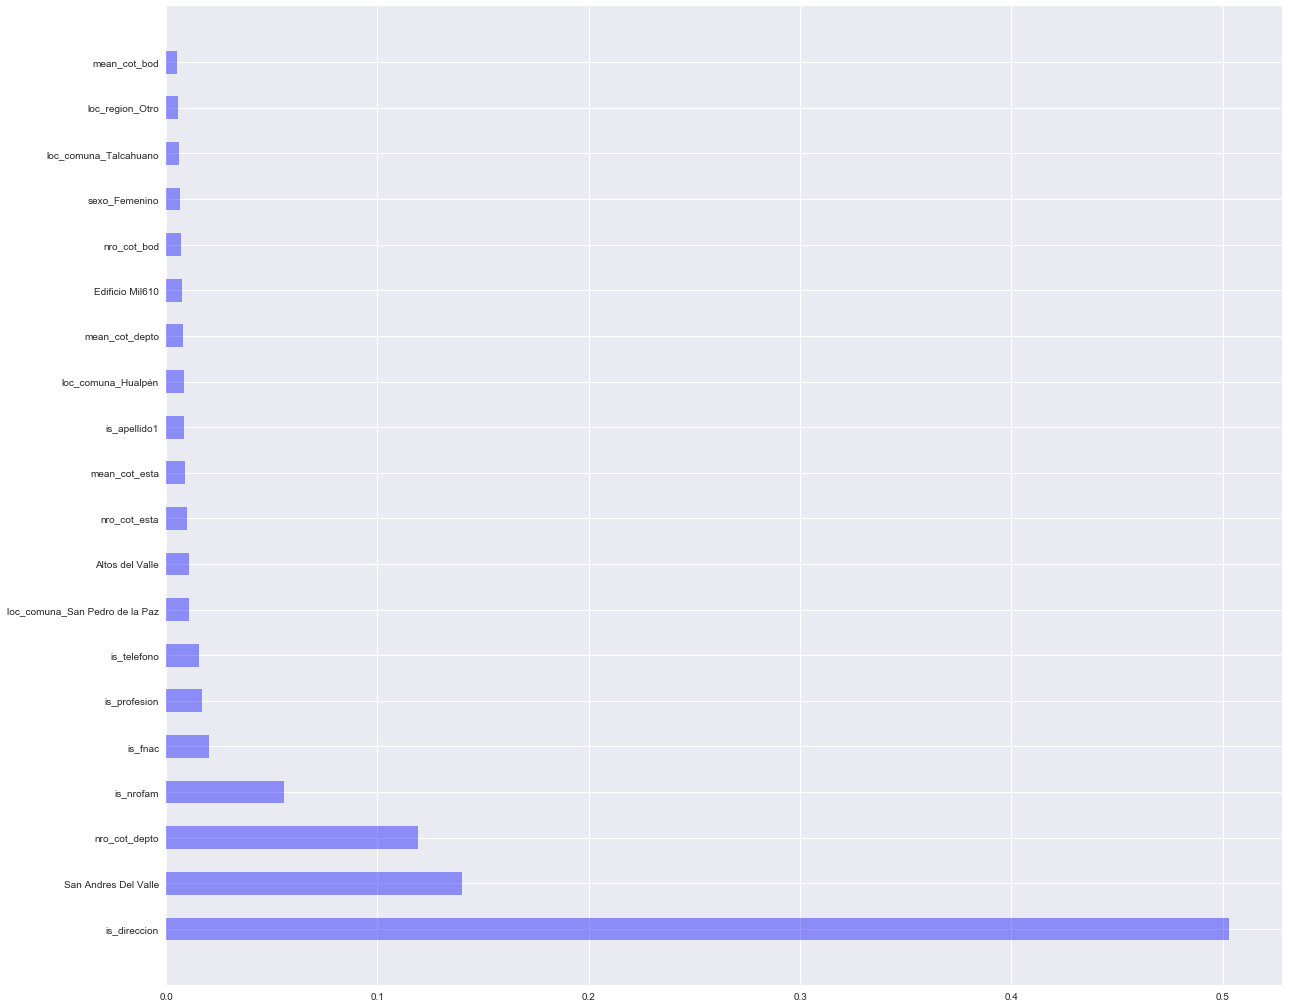

In [24]:
plot_importance_graph(tree_cv)

# RandomForest

Current Bests:

Best estimator is RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=24, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=12,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Tuned Decision Tree Parameters: {'n_estimators': 60, 'min_samples_split': 12, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 24, 'criterion': 'gini', 'bootstrap': True}
Best score is 0.8955368693402329
Best score is 0.8955368693402329

[[1494   36]
 [ 155  171]]
             precision    recall  f1-score   support

      False       0.91      0.98      0.94      1530
       True       0.83      0.52      0.64       326

avg / total       0.89      0.90      0.89      1856



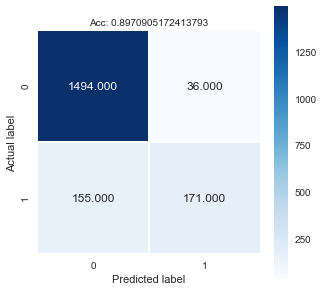

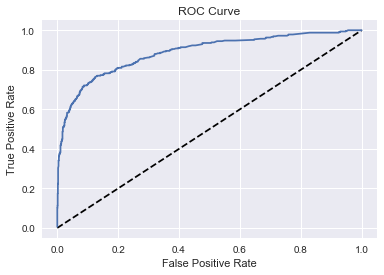

,importance,labels
3,0.275317,is_direccion
21,0.149819,San Andres Del Valle
4,0.145862,is_fnac
15,0.143808,nro_cot_depto
8,0.061959,is_profesion


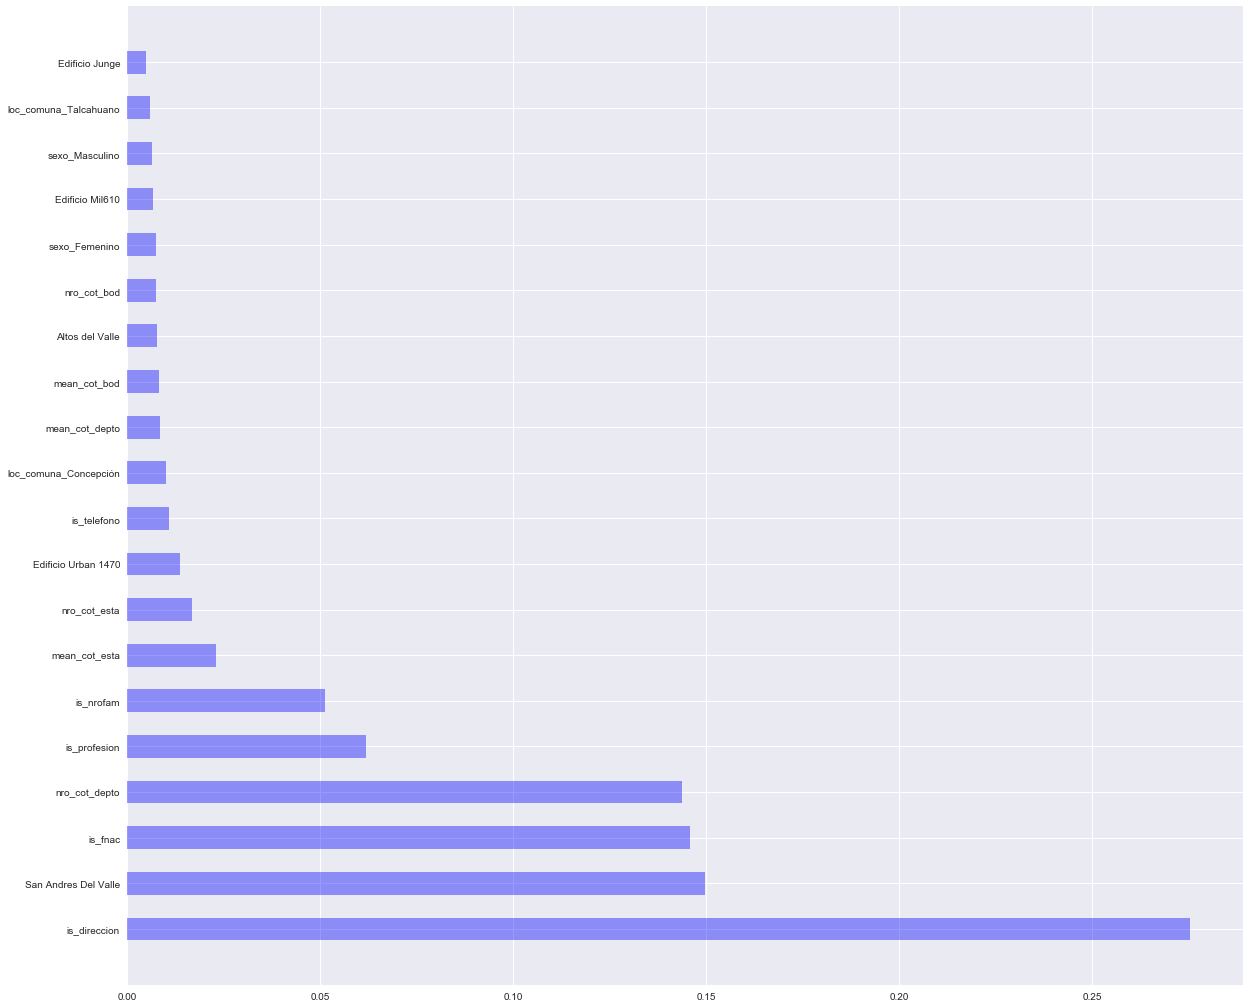

In [25]:
# Setup the parameters and distributions to sample from: param_dist

param_grid = {
    "max_depth": randint(1,30),
    "max_features":randint(1,40),
    "min_samples_leaf": randint(1,20),
    "criterion": ["gini", "entropy"],
    "min_samples_split": randint(2,20),
    "n_estimators":[20,30,40,50,60,70,80,90,100],
    "bootstrap": [True, False],
}
param_grid = {"max_depth": list(range(1,30)),
              'max_features': ['auto', 'sqrt', 'log2'],
#               "max_features":range(1,40),
              "min_samples_split": list(range(2,30)),
              "min_samples_leaf": list(range(1,20)),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
             "n_estimators":list(range(20,100,10)),
#               "class_weight":[None,'balanced' ],
}

# Instantiate a Decision Tree classifier: tree
rf = RandomForestClassifier()

# Stratified
from sklearn.model_selection import GridSearchCV, StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate the RandomizedSearchCV object: tree_cv
rf_cv = RandomizedSearchCV(rf, param_grid, cv=kf, n_jobs=N_JOBS, n_iter=300)
# rf_cv = GridSearchCV(rf, param_grid, cv=kf, n_jobs=N_JOBS)

# Fit it to the data
rf_cv.fit(X,y)

# Predict
# y_pred = rf_cv.predict(X_test)

# Print the tuned parameters and score
print("Best estimator is {}".format(rf_cv.best_estimator_))
print("Tuned Decision Tree Parameters: {}".format(rf_cv.best_params_))
print("Best score is {}".format(rf_cv.best_score_))

grid_results(rf_cv)
# # Confusion Matrix
# plot_confusion_matrix(rf_cv, X_test, y_test, y_pred)

# # ROC Curve
# roc_curve_plot(rf_cv, X_test, y_test)

# Feature Importance
plot_importance_graph(rf_cv)

Best Params:  {'min_samples_leaf': 1, 'max_features': 9, 'max_depth': 16, 'criterion': 'entropy'}
Best Estimator:  RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=16, max_features=9,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Accuracy:  0.9331896551724138
[[1316  214]
 [  79  247]]
             precision    recall  f1-score   support

      False       0.94      0.86      0.90      1530
       True       0.54      0.76      0.63       326

avg / total       0.87      0.84      0.85      1856



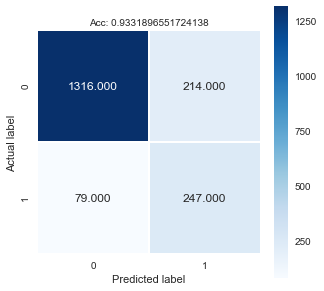

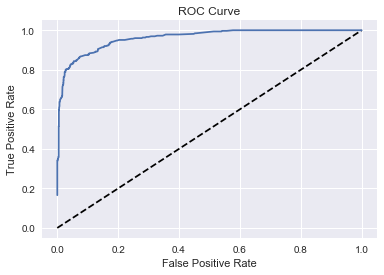

,importance,labels
3,0.259141,is_direccion
15,0.120955,nro_cot_depto
21,0.117046,San Andres Del Valle
4,0.061623,is_fnac
7,0.052792,is_nrofam


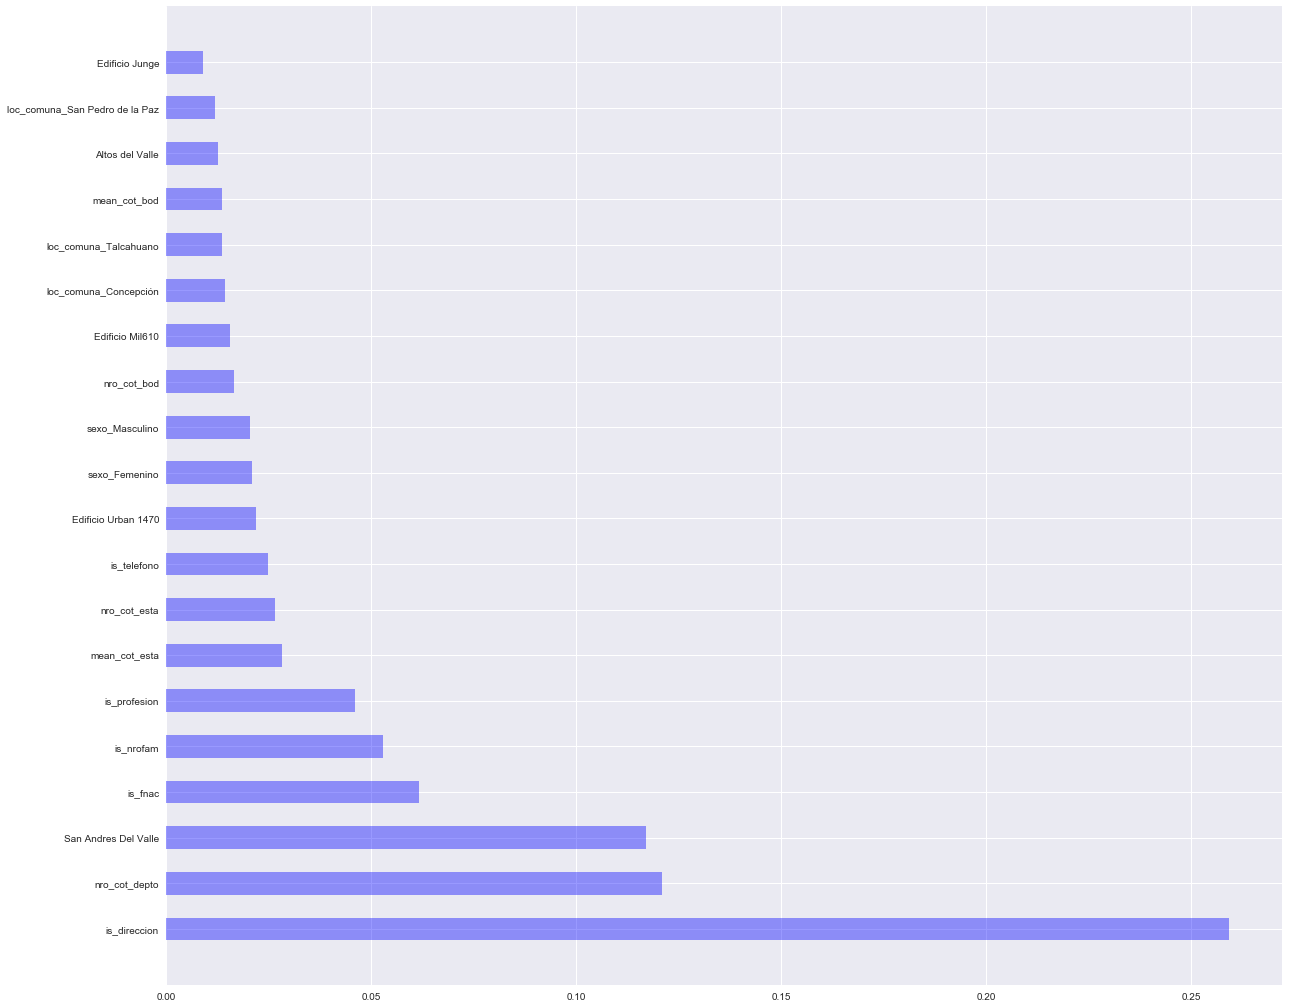

In [26]:
param_grid = {
    "max_depth": randint(1,30),
    "max_features":randint(1,40),
    "min_samples_leaf": randint(1,20),
    "criterion": ["gini", "entropy"],
    "min_samples_split": randint(2,20),
    "n_estimators":[20,30,40,50,60,70,80,90,100],
    "bootstrap": [True, False],
}

randomForest = RandomForestClassifier(class_weight='balanced')

# Stratified
from sklearn.model_selection import GridSearchCV, StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomSearch
randomForest_cv = RandomizedSearchCV(randomForest, param_dist, cv=kf, n_jobs=N_JOBS)
# Grid Search
# randomForest_cv = GridSearchCV(randomForest, param_grid, cv=kf, n_jobs=-1)

# Train
randomForest_cv.fit(X, y)

print("Best Params: ", randomForest_cv.best_params_)
print('Best Estimator: ', randomForest_cv.best_estimator_)

model = randomForest_cv.best_estimator_
# Make predictions
predictions = model.predict(X_test)

probs = model.predict_proba(X_test)
# display(predictions)

score = model.score(X_test, y_test)
print("Accuracy: ", score)

plot_confusion_matrix(model, X_test, y_test, y_pred)

roc_curve_plot(model, X_test, y_test)

plot_importance_graph(randomForest_cv)

### 3.5.6 SVM

C:\Users\joaquin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\joaquin\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'C': 10, 'gamma': 0.01}
Tuned Logistic Regression Parameters: {'C': 10, 'gamma': 0.01}
Best score is 0.8840556274256145
Best score is 0.8840556274256145

[[1452   78]
 [ 155  171]]
             precision    recall  f1-score   support

      False       0.90      0.95      0.93      1530
       True       0.69      0.52      0.59       326

avg / total       0.87      0.87      0.87      1856



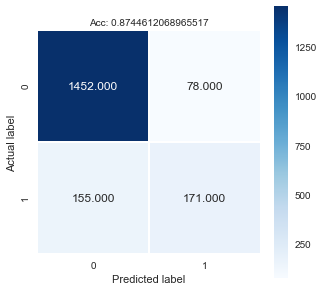

AttributeError: predict_proba is not available when  probability=False

In [27]:
from sklearn import svm, grid_search

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}

grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=5, n_jobs=-1)

grid_search.fit(X, y)

print(grid_search.best_params_)


# y_pred = grid_search.predict(X)
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(grid_search.best_params_)) 
print("Best score is {}".format(grid_search.best_score_))

grid_results(grid_search)

# plot_confusion_matrix(grid_search,X , y, y_pred)